<a href="https://colab.research.google.com/github/gweilnid/Python-Notebooks-for-Data-AI-Projects/blob/main/Lang_Conditional_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [42]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  number3: int
  operation2: str
  number4: int
  finalNumber: int
  finalNumber2: int

In [51]:
def adder(state:AgentState) -> AgentState:
  """This node adds the 2 number"""
  state['finalNumber'] = state['number1'] + state['number2']
  return state

def substractor(state:AgentState) -> AgentState:
  """This node substract the 2 number"""
  state['finalNumber'] = state['number1'] - state['number2']
  return state

def adder2(state:AgentState) -> AgentState:
  """This node adds the 2 number"""
  state['finalNumber2'] = state['number3'] + state['number4']
  return state

def substractor2(state:AgentState) -> AgentState:
  """This node substract the 2 number"""
  state['finalNumber2'] = state['number3'] - state['number4']
  return state


def decide_next_node(state:AgentState) -> AgentState:
    """This node decides which node to go to next"""

    if state["operation"] == "+":
      return "addition_operation"

    elif state["operation"] == "-":
      return "subtraction_operation"


def decide_next_node2(state:AgentState) -> AgentState:
    """This node decides which node to go to next"""

    if state["operation2"] == "+":
      return "addition_operation2"

    elif state["operation2"] == "-":
      return "subtraction_operation2"

In [52]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("substract_node", substractor)
graph.add_node("router", lambda state:state)

graph.add_node("add_node2", adder2)
graph.add_node("substract_node2", substractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge : Node
        "addition_operation": "add_node",
        "subtraction_operation": "substract_node",
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("substract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2" : "add_node2",
        "subtraction_operation2" : "substract_node2",
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("substract_node2", END)

app = graph.compile()

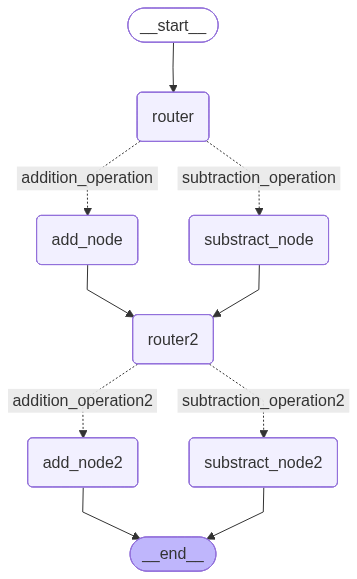

In [53]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [54]:
initial_state_1 = AgentState(number1 = 10, operation = "-", number2 = 5,
                             number3 = 7, operation2 = "+", number4 = 2)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber': 5, 'finalNumber2': 9}
